# Diabetes dataset supervised learning

Team Orange: Eino Kanerva, Aapo Saavalainen, and Mikko Sipola

Dataset: diabetes, [source](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)

Challenges for partner team:

**Task 1:** The scaling of the data is rather odd. In general, we don't need to scale data for simple regression model. Check if using original data from [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt) changes anything for our results and interpretation.

**Task 2:** Do the distributions of different variables differ between genders? Does gender have an effect in regression? Plot the data.

**Task 3:** Hyperparameter tuning for decision tree. We would be interested to see optimal model for this data. Hint: we would like to see some numerical scores :D

**Extra task:** If you have time and you are bored we would like to see the decision tree graph modified to look nicer ;)

### Loading libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

### Read data

<b>Task 1:</b> The scaling of the data is rather odd. In general, we don't need to scale data for simple regression model. Check if using original data from here changes anything for our results and interpretation.

<b><i>Toverit se .DESCR on nimenomaa noitten pythonissa valmiiks olevien datasettien, kuten iris, diabetes, wine, tollanen attribuutti, se ei oo eriksee mikää komento, sen takii se ei toiminu tässä meillä :D</b>

<b>Built-in Datasets in Python</b>

The main attributes of the datasets that you need to be aware of are:
* DESCR: to get a comprehensive description of the dataset
* data: to fetch the data of independent variables (features)
* target: to fetch the target variable
* feature_names: to get the names of features
* target_names: to get the names of target classes (target field name in case of regression data)






<b>Attributes from the dataset</b>
- age: age in years
- sex
- bmi: body mass index
- bp: average blood pressure
- s1: tc, total serum cholesterol
- s2: ldl, low-density lipoproteins
- s3: hdl, high-density lipoproteins
- s4: tch, total cholesterol / HDL
- s5: ltg, possibly log of serum triglycerides level
- s6: glu, blood sugar level

In [2]:
diabetes_org = pd.read_table('diabetes.tab.txt')
#diabetes_org.loc[:,"prog"] = y #add diabetes progression to data frame
#the Y-column is the same as the prog, couldn't really change the name of that
diabetes_org.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
diabetes_org.dtypes

AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object

In [4]:
X = diabetes_org[['AGE', 'SEX','BMI','BP','S1', 'S2','S3','S4','S5','S6']]
y = diabetes_org.Y #is the 'prog', naming the column is problem
names = diabetes_org.columns

In [5]:
#how many people are there in the sex-groups
diabetes_org.groupby('SEX').size()

SEX
1    235
2    207
dtype: int64

In [6]:
#proportions of genders
diabetes_org.SEX.value_counts()/len(diabetes_org) 

1    0.531674
2    0.468326
Name: SEX, dtype: float64

<AxesSubplot:>

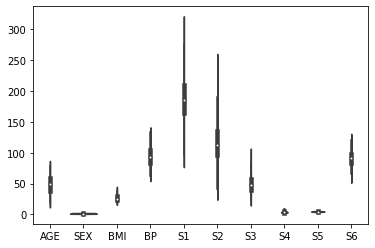

In [7]:
sns.violinplot(data=diabetes_org.iloc[:,:-1])

#This plot doesn't really work with this original data.

### Linear regression model

In [8]:
from sklearn.model_selection import train_test_split

X = diabetes_org[['AGE', 'SEX','BMI','BP','S1', 'S2','S3','S4','S5','S6']]
y = diabetes_org.Y

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=42)

In [9]:
for s in (X_train, y_train, X_test, y_test):
    print(s.shape)

(353, 10)
(353,)
(89, 10)
(89,)


In [10]:
linreg = LinearRegression()
model = linreg.fit(X_train,y_train)

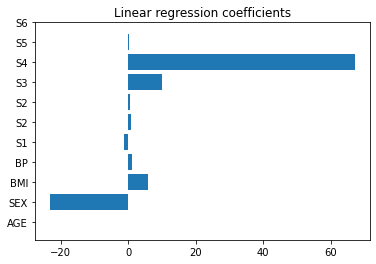

In [11]:
# visualize the coefficients
plt.barh(range(model.coef_.shape[0]),model.coef_)
plt.yticks(ticks=range(11),labels=diabetes_org[['AGE', 'SEX','BMI','BP','S1', 'S2', 'S2','S3','S4','S5','S6']])
plt.title("Linear regression coefficients")
plt.show()

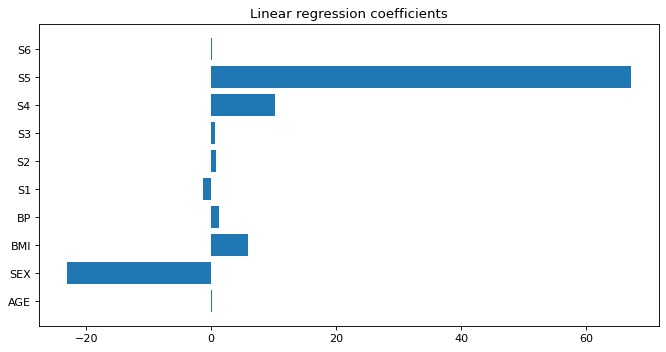

In [12]:
from matplotlib.pyplot import figure

figure(figsize=(10, 5), dpi=80)
plt.barh(range(model.coef_.shape[0]),model.coef_)
plt.yticks(ticks=range(10),labels=diabetes_org[['AGE', 'SEX','BMI','BP','S1', 'S2','S3','S4','S5','S6']])
plt.title("Linear regression coefficients")
plt.show()

In [13]:
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.13769
Feature: 1, Score: -23.06447
Feature: 2, Score: 5.84636
Feature: 3, Score: 1.19709
Feature: 4, Score: -1.28168
Feature: 5, Score: 0.81115
Feature: 6, Score: 0.60165
Feature: 7, Score: 10.15954
Feature: 8, Score: 67.10896
Feature: 9, Score: 0.20160


In [14]:
pred = linreg.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, pred))

Mean squared error: 2900.19
Coefficient of determination: 0.45


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  This is separate from the ipykernel package so we can avoid doing imports until


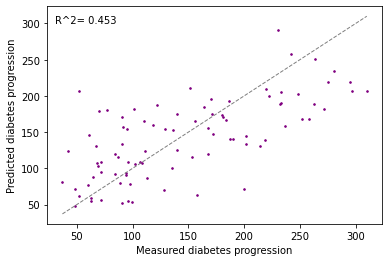

In [17]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred,s=2.5,color='purple')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=1,color='gray')
ax.set_xlabel("Measured diabetes progression")
ax.set_ylabel("Predicted diabetes progression")
ax.text(30,300,"R^2= %.3f" % r2_score(y_test, pred))
plt.show()

<b>Task 1 ends</b>

### Decision tree model

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
from sklearn import tree

In [20]:
model=DecisionTreeClassifier()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.5, random_state=0)


In [22]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(442, 10) (442,)
(221, 10) (221,)
(221, 10) (221,)


In [23]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

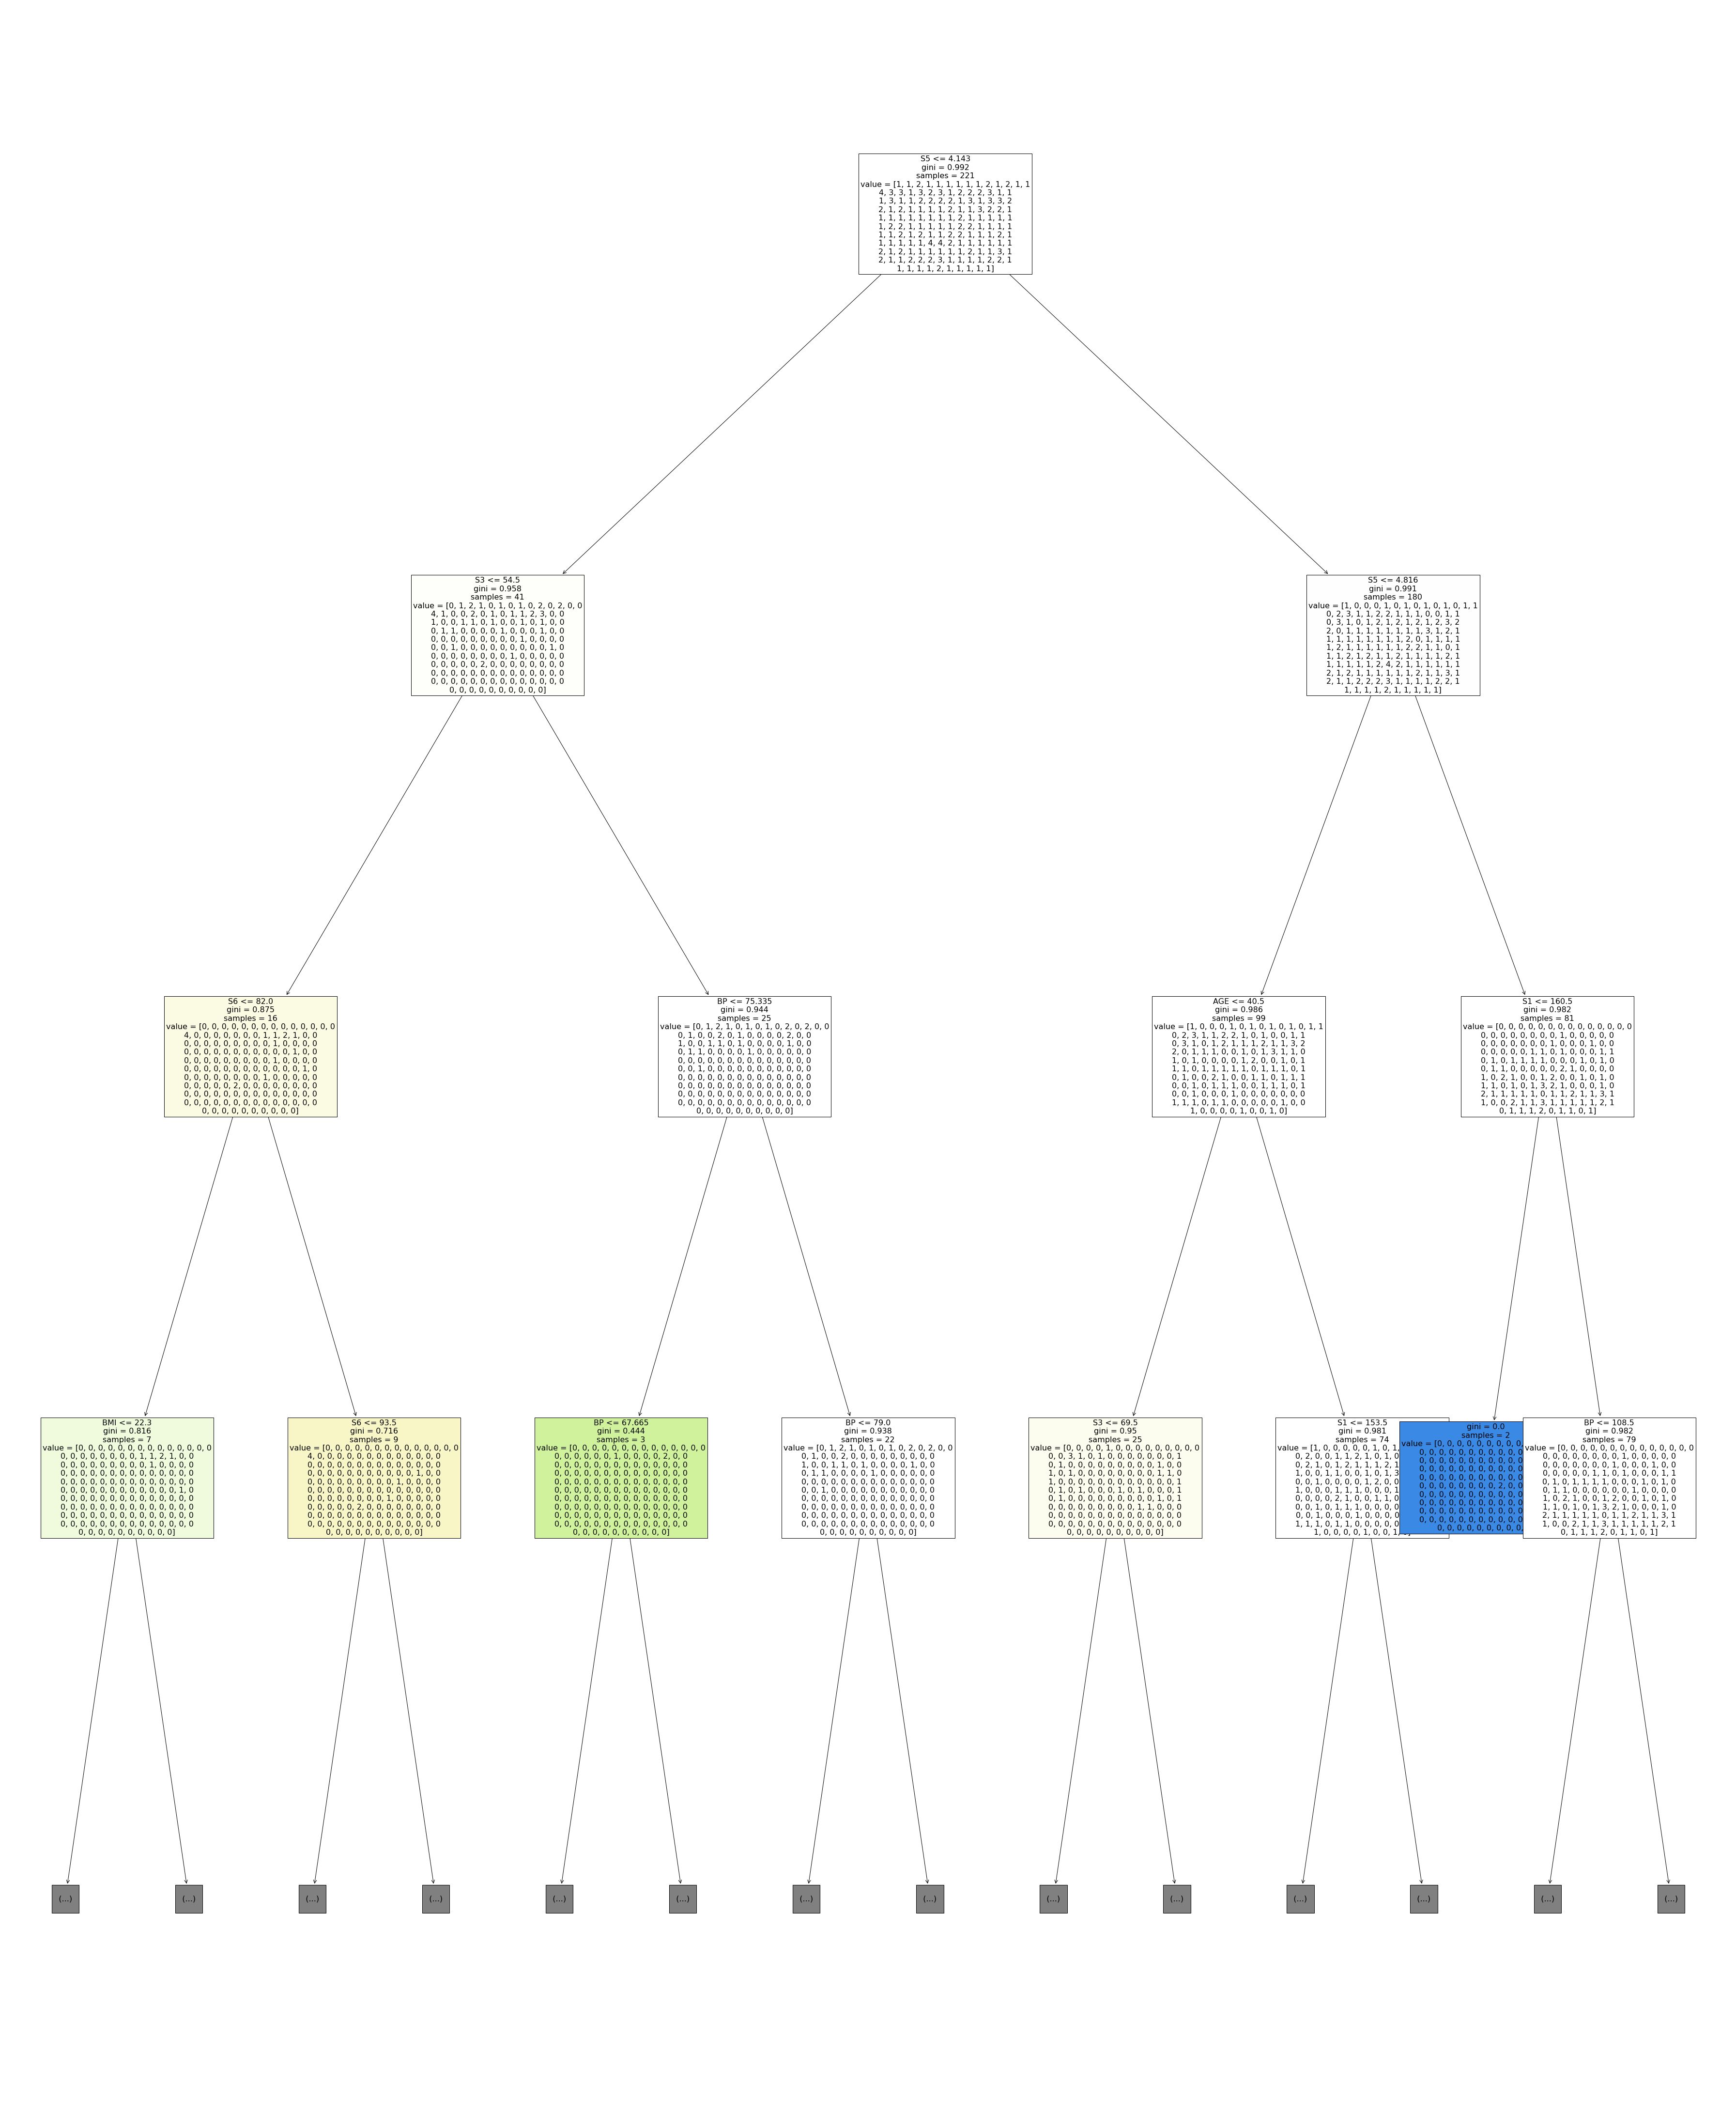

In [24]:
plt.figure(figsize=(64,80))
tree.plot_tree(model,feature_names=diabetes_org.columns, max_depth=3,filled=True, fontsize=16); plt.show()

In [25]:
for i,j in zip(model.feature_importances_, diabetes_org.columns):
    print('{} importance: {} \n'.format(i,j))

#don't know what happened here, why the score and name changed places

<b>Task 2:</b> Do the distributions of different variables differ between genders? Does gender have an effect in regression? Plot the data.

In [26]:
#splitting the data to 2 genders
diabetes_org1 = diabetes_org[diabetes_org['SEX']== 1]
diabetes_org2 = diabetes_org[diabetes_org['SEX'] == 2]

0.08996725199002432 importance: AGE 

0.038631045778621975 importance: SEX 

0.0842643222395882 importance: BMI 

0.12398471730531459 importance: BP 

0.11354303569725374 importance: S1 

0.10342169736009028 importance: S2 

0.12955769190472738 importance: S3 

0.04382380873730283 importance: S4 

0.13157932124745758 importance: S5 

0.14122710773961908 importance: S6 



<AxesSubplot:>

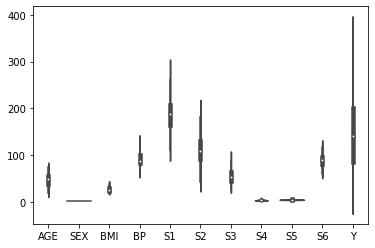

In [27]:
#sex 1
sns.violinplot(data=diabetes_org1)

<AxesSubplot:>

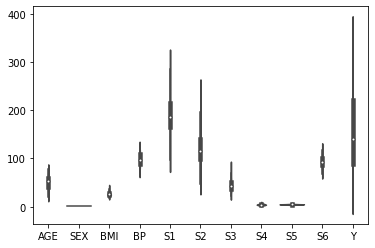

In [28]:
#sex 2
sns.violinplot(data=diabetes_org2)

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'BP'}>,
        <AxesSubplot:title={'center':'S1'}>,
        <AxesSubplot:title={'center':'S2'}>],
       [<AxesSubplot:title={'center':'S3'}>,
        <AxesSubplot:title={'center':'S4'}>,
        <AxesSubplot:title={'center':'S5'}>],
       [<AxesSubplot:title={'center':'S6'}>,
        <AxesSubplot:title={'center':'Y'}>, <AxesSubplot:>]], dtype=object)

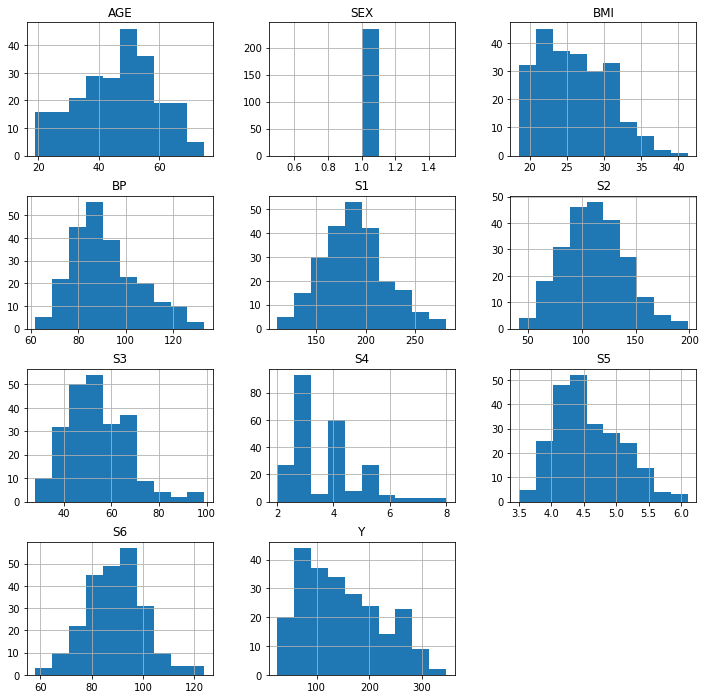

In [29]:
#sex 1
diabetes_org1.hist(figsize=(12,12))

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'BP'}>,
        <AxesSubplot:title={'center':'S1'}>,
        <AxesSubplot:title={'center':'S2'}>],
       [<AxesSubplot:title={'center':'S3'}>,
        <AxesSubplot:title={'center':'S4'}>,
        <AxesSubplot:title={'center':'S5'}>],
       [<AxesSubplot:title={'center':'S6'}>,
        <AxesSubplot:title={'center':'Y'}>, <AxesSubplot:>]], dtype=object)

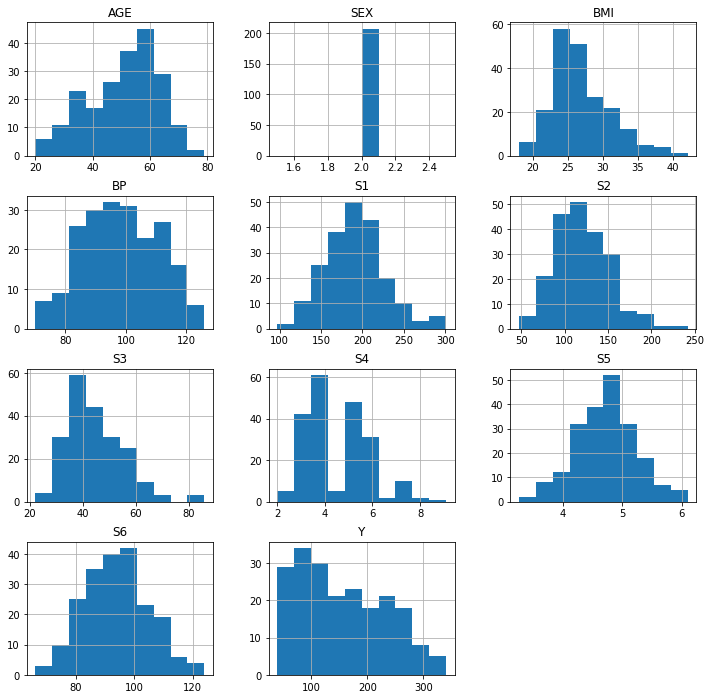

In [30]:
#sex 2
diabetes_org2.hist(figsize=(12,12))

We see differences in many columns between the sexes!

<b>Gender 1 effect on progression

In [31]:
X1 = diabetes_org1[['AGE', 'SEX','BMI','BP','S1', 'S2','S3','S4','S5','S6']]
y1 = diabetes_org1.Y

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.8,random_state=42)

In [32]:
for s in (X_train1, y_train1, X_test1, y_test1):
    print(s.shape)

(188, 10)
(188,)
(47, 10)
(47,)


In [33]:
linreg = LinearRegression()
model1 = linreg.fit(X_train1,y_train1)

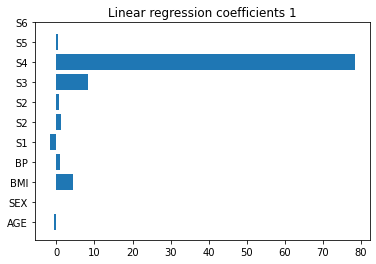

In [34]:
# visualize the coefficients
plt.barh(range(model1.coef_.shape[0]),model1.coef_)
plt.yticks(ticks=range(11),labels=diabetes_org1[['AGE', 'SEX','BMI','BP','S1', 'S2', 'S2','S3','S4','S5','S6']])
plt.title("Linear regression coefficients 1")
plt.show()

In [35]:
importance1 = model1.coef_
# summarize feature importance
for i,v in enumerate(importance1):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.54990
Feature: 1, Score: -0.00000
Feature: 2, Score: 4.46522
Feature: 3, Score: 0.94922
Feature: 4, Score: -1.63444
Feature: 5, Score: 1.34224
Feature: 6, Score: 0.72331
Feature: 7, Score: 8.40067
Feature: 8, Score: 78.31704
Feature: 9, Score: 0.29910


In [36]:
pred1 = linreg.predict(X_test1)

In [37]:
print("Mean squared error: %.2f" % mean_squared_error(y_test1, pred1))
print("Coefficient of determination: %.2f" % r2_score(y_test1, pred1))

Mean squared error: 2434.94
Coefficient of determination: 0.49


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  This is separate from the ipykernel package so we can avoid doing imports until


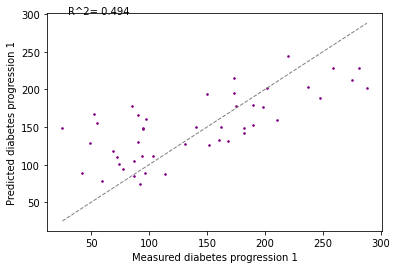

In [38]:
fig, ax = plt.subplots()
ax.scatter(y_test1, pred1,s=2.5,color='purple')
ax.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], "k--", lw=1,color='gray')
ax.set_xlabel("Measured diabetes progression 1")
ax.set_ylabel("Predicted diabetes progression 1")
ax.text(30,300,"R^2= %.3f" % r2_score(y_test1, pred1))
plt.show()

<b>Gender 2 effect on progression

In [39]:
X2 = diabetes_org2[['AGE', 'SEX','BMI','BP','S1', 'S2','S3','S4','S5','S6']]
y2 = diabetes_org2.Y

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=0.8,random_state=42)

In [40]:
for s in (X_train2, y_train2, X_test2, y_test2):
    print(s.shape)

(165, 10)
(165,)
(42, 10)
(42,)


In [41]:
linreg = LinearRegression()
model2 = linreg.fit(X_train2,y_train2)

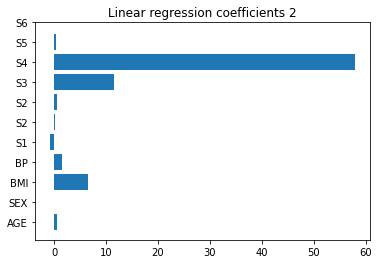

In [42]:
# visualize the coefficients
plt.barh(range(model2.coef_.shape[0]),model2.coef_)
plt.yticks(ticks=range(11),labels=diabetes_org2[['AGE', 'SEX','BMI','BP','S1', 'S2', 'S2','S3','S4','S5','S6']])
plt.title("Linear regression coefficients 2")
plt.show()

In [43]:
importance2 = model2.coef_
# summarize feature importance
for i,v in enumerate(importance2):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.48552
Feature: 1, Score: 0.00000
Feature: 2, Score: 6.59757
Feature: 3, Score: 1.45163
Feature: 4, Score: -0.74869
Feature: 5, Score: 0.14135
Feature: 6, Score: 0.49911
Feature: 7, Score: 11.61650
Feature: 8, Score: 57.80333
Feature: 9, Score: 0.35172


In [44]:
pred2 = linreg.predict(X_test2)

In [45]:
print("Mean squared error: %.2f" % mean_squared_error(y_test2, pred2))
print("Coefficient of determination: %.2f" % r2_score(y_test2, pred2))

Mean squared error: 2230.01
Coefficient of determination: 0.66


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  This is separate from the ipykernel package so we can avoid doing imports until


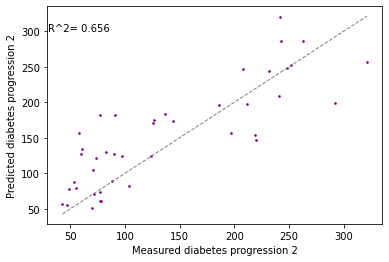

In [46]:
fig, ax = plt.subplots()
ax.scatter(y_test2, pred2,s=2.5,color='purple')
ax.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], "k--", lw=1,color='gray')
ax.set_xlabel("Measured diabetes progression 2")
ax.set_ylabel("Predicted diabetes progression 2")
ax.text(30,300,"R^2= %.3f" % r2_score(y_test2, pred2))
plt.show()

Task 3: Hyperparameter tuning for decision tree. We would be interested to see optimal model for this data. Hint: we would like to see some numerical scores :D

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
#choosing a model
clf = DecisionTreeClassifier()

search = GridSearchCV(clf,cv=3, param_grid = {'criterion':['gini','entropy', 'log_loss'],
                                        'max_depth':[3,4,5,6,7],
                                        #'min_samples_split':[2,3],
                                        'min_samples_leaf':[1,2]})

In [49]:
#fitting the model
search.fit(X_train, y_train)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/tree/_classes.p

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2]})

In [50]:
#choosing best params
search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}

In [51]:
search.score(X_train, y_train)

0.2081447963800905

In [52]:
#predicting the model
prediction = search.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score


In [54]:
#accuracy score for the prediction
accuracy_score(prediction,y_test)

0.004524886877828055

Looks very accurate :D /sarcasm

We didn't have time to define the hyperparameter search to be better.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2ffac352-9a3c-4b65-a47a-4d1926384316' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>